In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import numpy as np
from gaussian_bandits import GaussianBanditArm,ThompsonSampling, LifelongThompsonSampling
plt.style.use("cyberpunk")

In [2]:
num_arms = 4
num_cls_per_task = 2
# generate random means and standard deviations for each arm
means = np.random.normal(0, 10, num_arms)
stds = np.random.uniform(0, 10, num_arms)
# create the bandit arms
arms = [GaussianBanditArm(mu, sigma) for mu, sigma in zip(means, stds)]
arms

[N(9.399, 2.644), N(3.981, 7.607), N(-7.759, 5.811), N(-5.399, 0.260)]

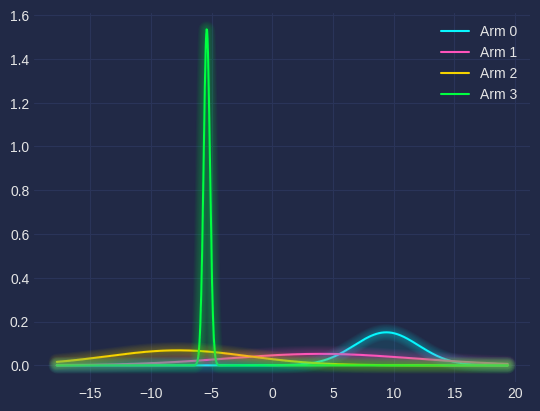

In [3]:
# plot the distribution of each arm
x = np.linspace(min(means)-10, max(means)+10, 1000)
for arm in arms:
    plt.plot(x, arm.dist.pdf(x))
plt.legend([f"Arm {i}" for i in range(num_arms)])
mplcyberpunk.add_glow_effects();
plt.show()

In [4]:
solver = LifelongThompsonSampling(arms, num_cls_per_task)

In [5]:
n_trials = 100
rewards0, actions0 = solver.learn_tasks(0, n_trials=n_trials)
rewards1, actions1 = solver.learn_tasks(1, n_trials=n_trials)

In [6]:
rewards = rewards0 + rewards1
actions = actions0 + actions1

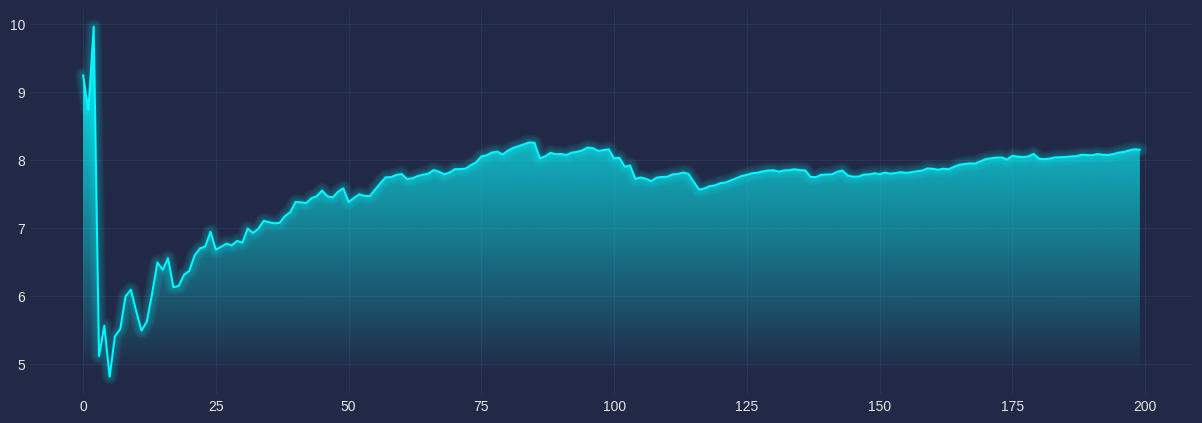

In [7]:
# plot the cum_avg rewards
plt.figure(figsize=(15, 5))
cum_avg_rewards = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
plt.plot(cum_avg_rewards);
mplcyberpunk.make_lines_glow();
mplcyberpunk.add_gradient_fill();

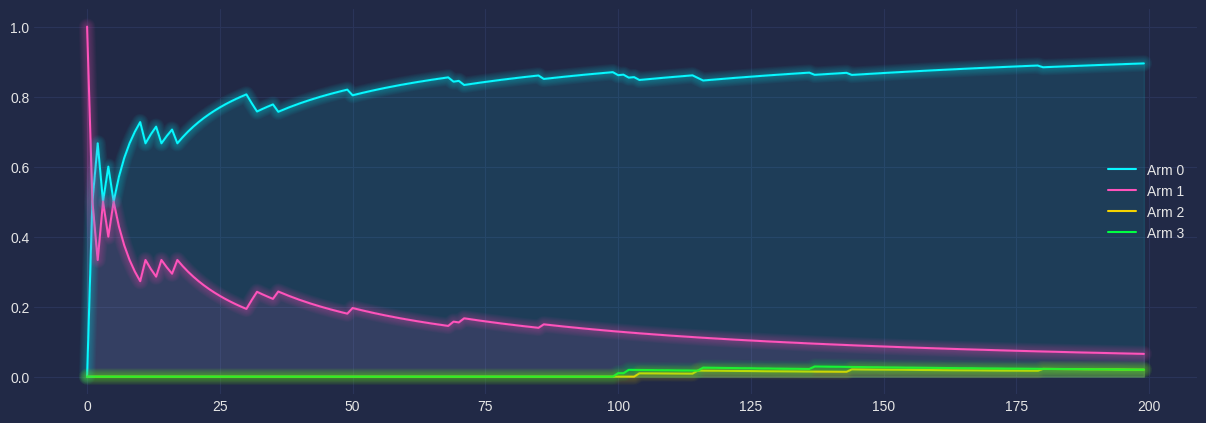

In [8]:
# compute this first, ret shape is (2 * num_trials, num_arms)
ret = np.zeros((len(actions), num_arms))
for i, action in enumerate(actions):
    ret[i, action] = 1

ret = np.cumsum(ret, axis=0) 
# normalize each row
ret = ret / np.sum(ret, axis=1, keepdims=True)

# plot ret
plt.figure(figsize=(15, 5))
for i in range(num_arms):
    plt.plot(ret[:, i], label=f"Arm {i}")
plt.legend();
mplcyberpunk.add_glow_effects();

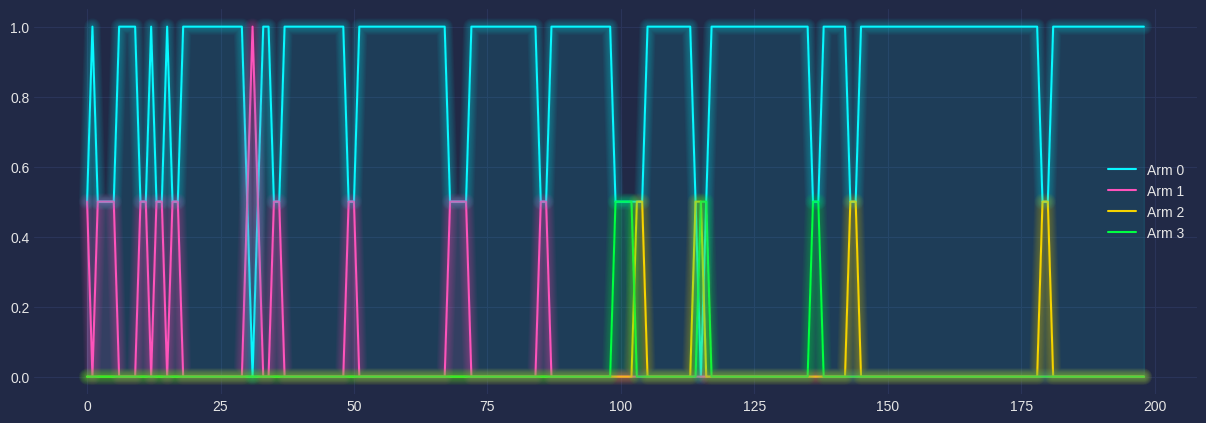

In [9]:
ret = np.zeros((len(actions), num_arms))
for i, action in enumerate(actions):
    ret[i, action] = 1

window_size = 2
# get the sum of a rolling window of size 10 for ret using pandas
df = pd.DataFrame(ret).rolling(window_size).sum()
# throw away the first window_size - 1 rows
df = df[window_size - 1:]
# df back to numpy
ret = df.to_numpy()
ret = ret / np.sum(ret, axis=1, keepdims=True)

# plot ret
plt.figure(figsize=(15, 5))
for i in range(num_arms):
    plt.plot(ret[:, i], label=f"Arm {i}")
plt.legend();
mplcyberpunk.add_glow_effects();

In [ ]:
# solver = ThompsonSampling(arms, num_cls_per_task)
# num_trials = 200
# log_every = 10
# rewards = np.zeros(num_trials)
# actions = []
# for i in range(num_trials):
#     arm = solver.select_arm()
#     actions.append(arm)
#     reward = arms[arm].pull()
#     solver.update(arm, reward)
#     rewards[i] = reward
#     if i % log_every == 0:
#         # plot the distribution of each arm estimated by the solver
#         # on a subplot
#         plt.figure(figsize=(15, 5))
#         posterior = solver.posterior
#         print(posterior)
#         x = np.linspace(min(solver.m)-10, max(solver.m)+10, 1000)
#         for j in range(num_arms):
#             plt.subplot(1, num_arms, j+1)
#             plt.plot(x, arms[j].dist.pdf(x), label="True")
#             plt.plot(x, posterior[j].pdf(x), label="Estimated")
#             plt.legend()
#             plt.title(f"Arm {j} @ time {i}")
#             mplcyberpunk.add_glow_effects();

In [ ]:
# plot fraction of times that the optimal arm is selected
optimals = np.array(actions) == np.argmax(means)
# calculate the cumulative average
cum_avg_opt = np.cumsum(optimals) / (np.arange(num_trials) + 1)
plt.figure(figsize=(15, 5))
plt.plot(cum_avg_opt);

In [ ]:
# plot the cum_avg rewards
plt.figure(figsize=(15, 5))
cum_avg_rewards = np.cumsum(rewards) / (np.arange(num_trials) + 1)
plt.plot(cum_avg_rewards);